In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import pickle
import io



***DATA LOADING***

In [ ]:
# Load datasets
goog_data = pd.read_csv('/Users/aarushimahajan/Downloads/GOOG.csv')
nflx_data = pd.read_csv('/Users/aarushimahajan/Downloads/NFLX.csv')
yahoo_data = pd.read_csv('/Users/aarushimahajan/Downloads/yahoo_stock.csv')

In [67]:
 #Display the first few rows of each dataset
print("GOOG Data")
print(goog_data.head())
print("\nNFLX Data")
print(nflx_data.head())
print("\nYahoo Data")
print(yahoo_data.head())

GOOG Data
  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  

NFLX Data
     

In [68]:
# Display the columns of each dataset
print("GOOG Data Columns:", goog_data.columns)
print("NFLX Data Columns:", nflx_data.columns)
print("Yahoo Data Columns:", yahoo_data.columns)

GOOG Data Columns: Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')
NFLX Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Yahoo Data Columns: Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


***Exploratory Data Analysis***

Summary Statistics for GOOG
       symbol        close         high          low         open  \
count  1239.0  1239.000000  1239.000000  1239.000000  1239.000000   
mean      0.0  1224.286796  1235.502555  1212.049654  1223.218612   
std       0.0   380.773012   384.963342   376.249716   379.883529   
min       0.0   716.980000   722.210000   715.910000   719.120000   
25%       0.0   973.125000   980.515000   966.040000   973.810000   
50%       0.0  1138.070000  1146.900000  1124.240000  1135.820000   
75%       0.0  1373.335000  1391.435000  1351.160000  1363.170000   
max       0.0  2521.600000  2526.990000  2498.290000  2524.920000   

             volume     adjClose      adjHigh      adjLow      adjOpen  \
count  1.239000e+03  1239.000000  1239.000000  1239.00000  1239.000000   
mean   1.597245e+06  1224.286796  1235.502557  1212.04966  1223.218612   
std    6.929534e+05   380.773012   384.963344   376.24972   379.883529   
min    3.467530e+05   716.980000   722.210000   715.91

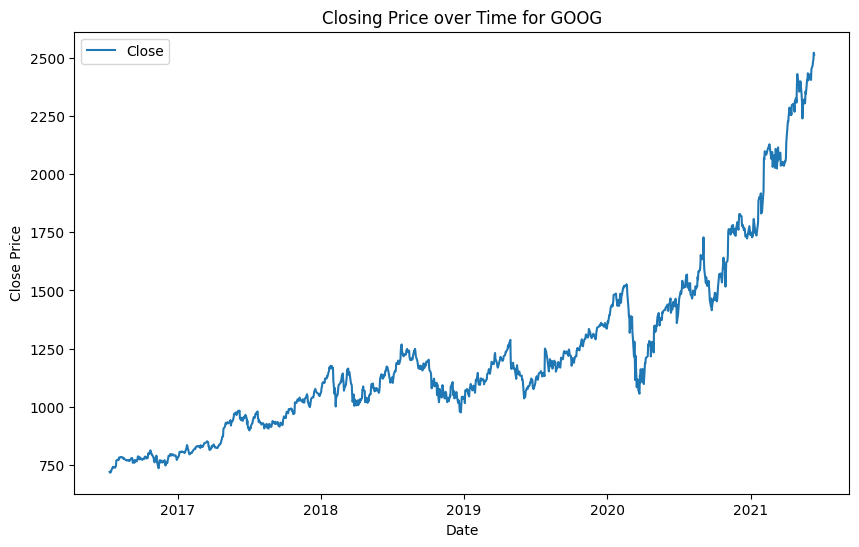

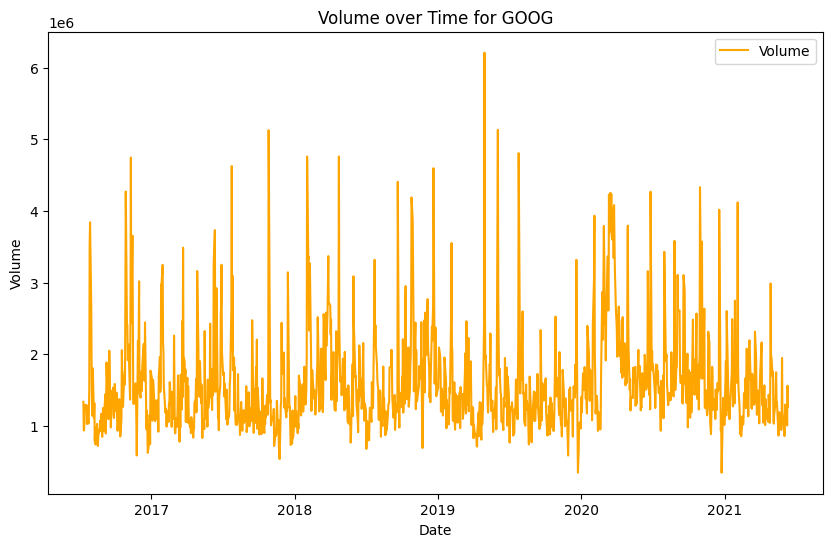

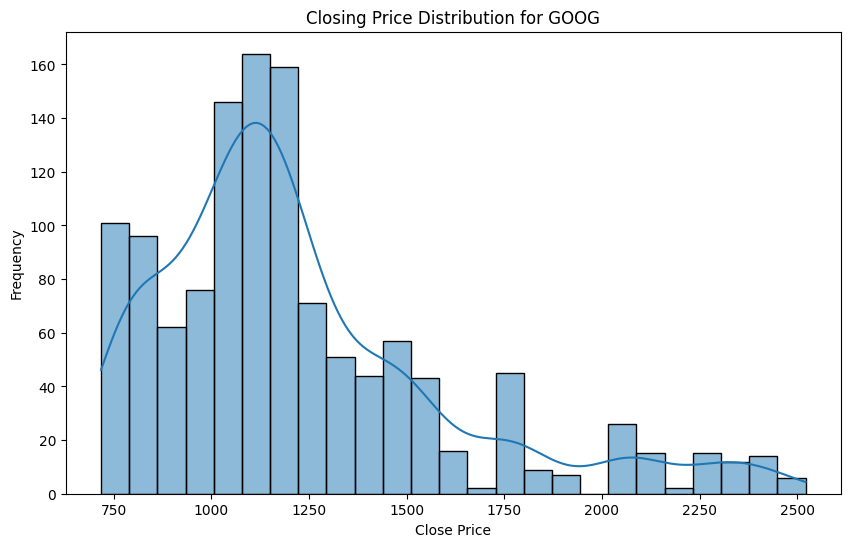

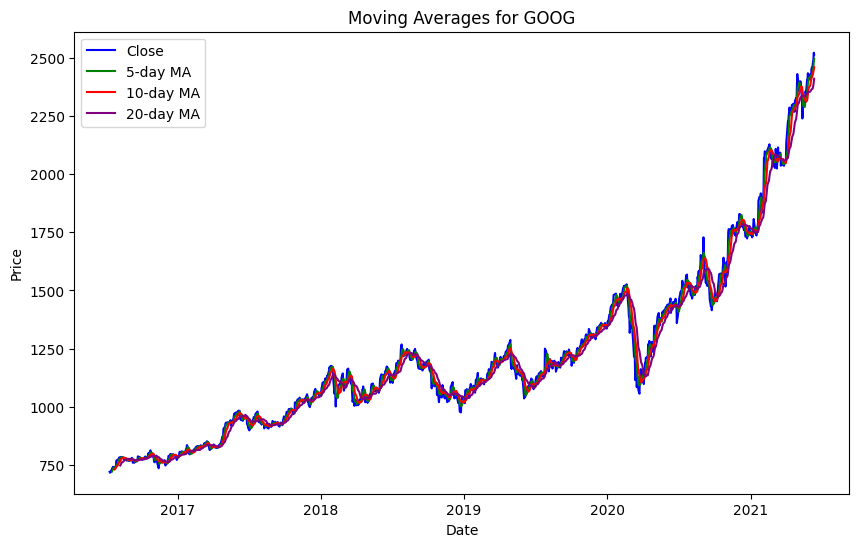

Summary Statistics for NFLX
             Open        High         Low       Close   Adj Close  \
count  990.000000  990.000000  990.000000  990.000000  990.000000   
mean   421.855182  428.118262  415.139667  421.773101  421.773101   
std    107.643937  108.388444  106.671289  107.418901  107.418901   
min    233.919998  250.649994  231.229996  233.880005  233.880005   
25%    334.097488  338.669998  328.797493  334.629990  334.629990   
50%    379.190002  384.899994  374.610001  380.040008  380.040008   
75%    511.177498  517.760010  503.562508  510.639999  510.639999   
max    692.349976  700.989990  686.090027  691.690002  691.690002   

             Volume        MA_5       MA_10       MA_20  Volume_Change  \
count  9.900000e+02  990.000000  990.000000  990.000000     990.000000   
mean   7.522980e+06  421.525660  421.217639  420.391056       0.073661   
std    5.496647e+06  107.129870  106.890356  106.605437       0.451269   
min    1.144000e+06  249.117999  257.351996  264.46550

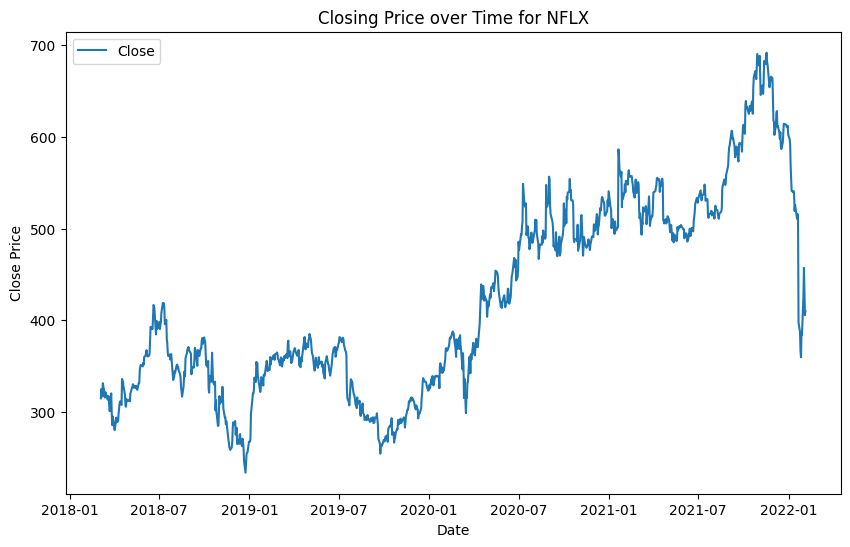

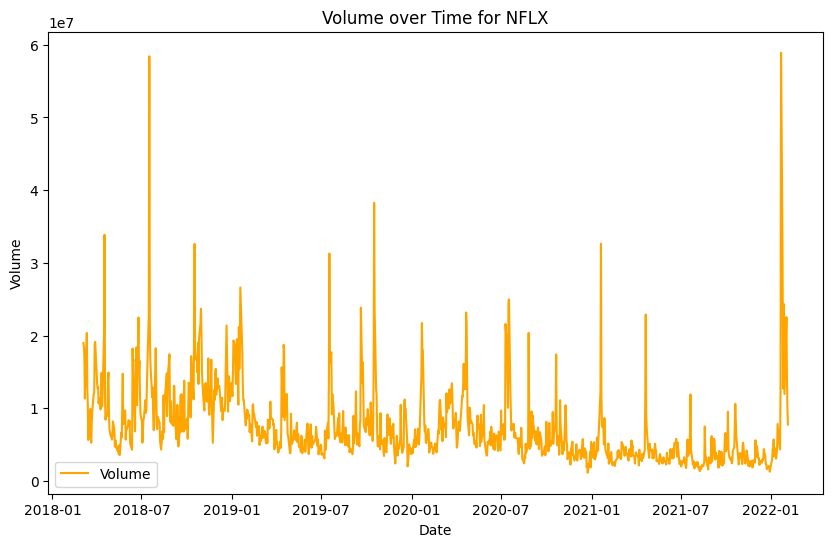

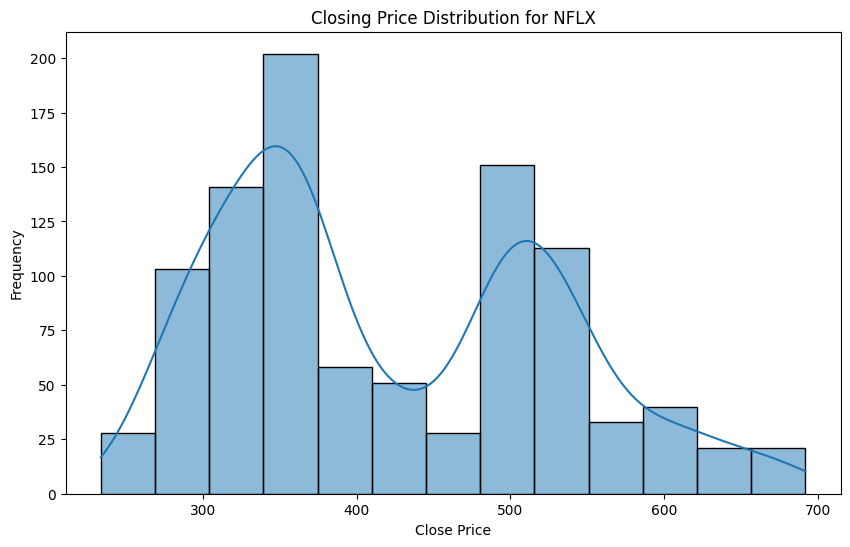

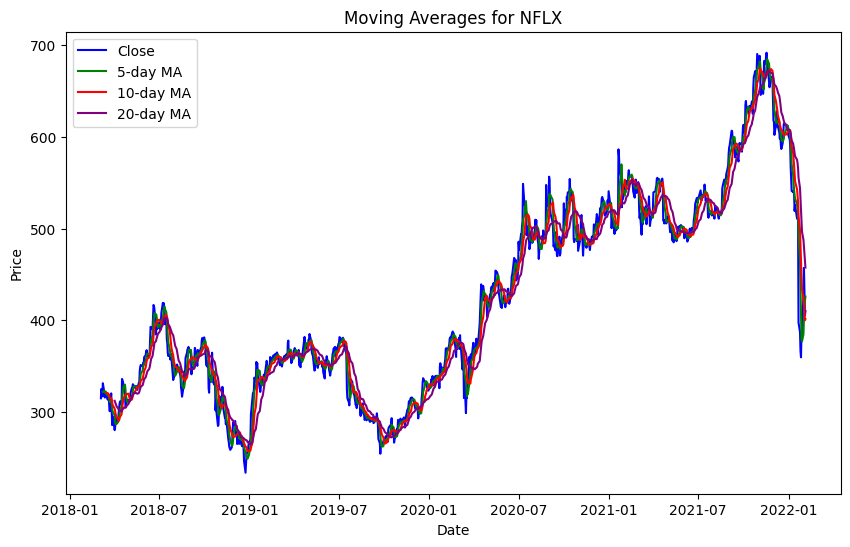

Summary Statistics for Yahoo
              High          Low         Open        Close        Volume  \
count  1806.000000  1806.000000  1806.000000  1806.000000  1.806000e+03   
mean   2666.737811  2638.797782  2653.716545  2653.861461  3.873190e+09   
std     407.579964   402.176031   405.038046   405.178685  1.088011e+09   
min    1847.000000  1810.099976  1833.400024  1829.079956  1.296540e+09   
25%    2356.189941  2337.939941  2350.419922  2348.689941  3.257950e+09   
50%    2708.305054  2677.385010  2691.260010  2691.250000  3.607255e+09   
75%    2931.614929  2902.879883  2916.899902  2919.190063  4.134812e+09   
max    3645.989990  3600.159912  3612.090088  3626.909912  9.044690e+09   

         Adj Close         MA_5        MA_10        MA_20  Volume_Change  \
count  1806.000000  1806.000000  1806.000000  1806.000000    1806.000000   
mean   2653.861461  2652.160920  2650.055358  2645.996470       0.009938   
std     405.178685   403.894874   402.267392   399.232860       0.1

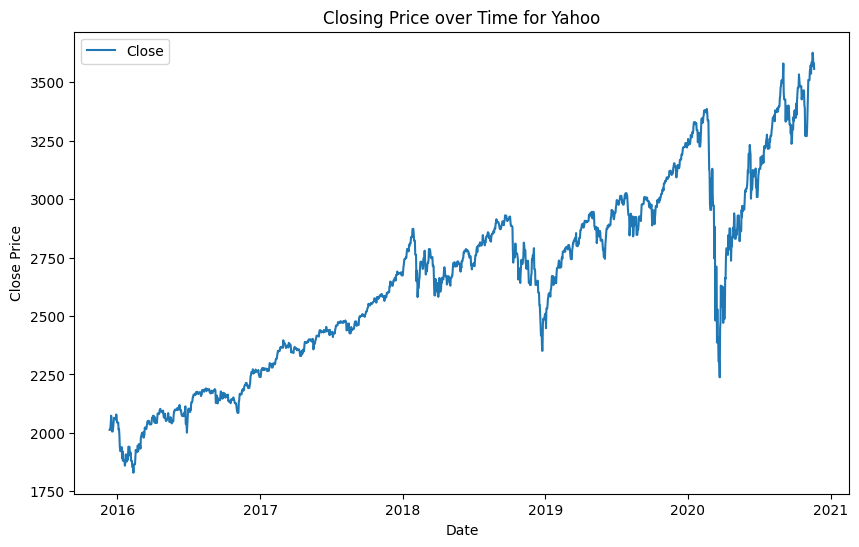

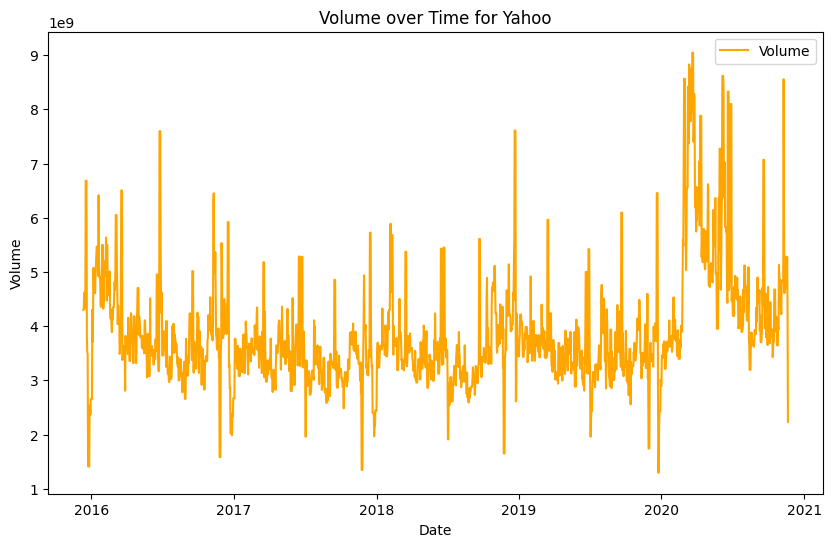

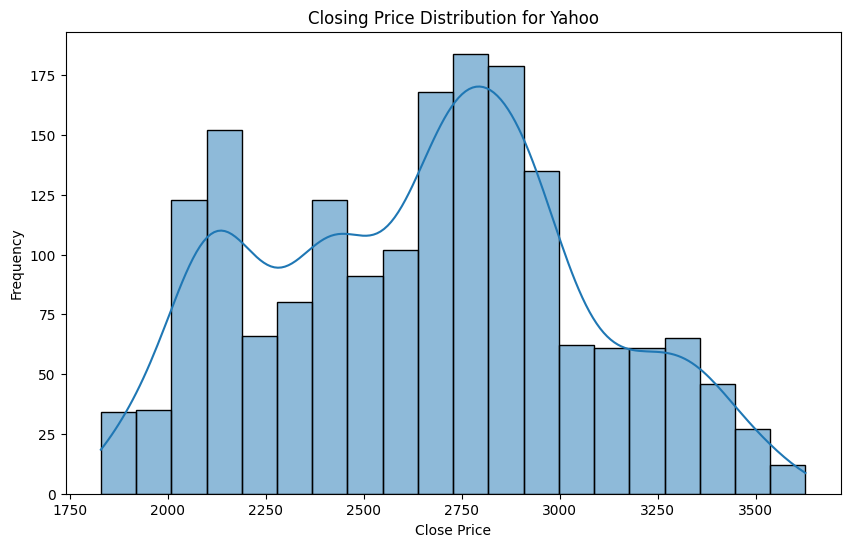

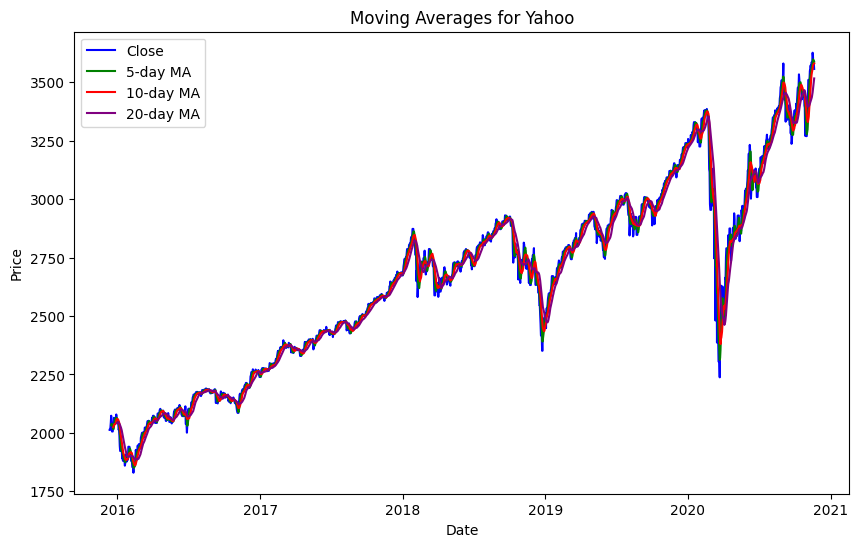

In [76]:
# Function to perform EDA
def perform_eda(df, title):
    print(f"Summary Statistics for {title}")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Determine the correct column names for close and volume
    close_column = 'Close'
    volume_column = 'Volume'
    
    if 'close' in df.columns:
        close_column = 'close'
    elif 'adjClose' in df.columns:
        close_column = 'adjClose'
    
    if 'volume' in df.columns:
        volume_column = 'volume'
    elif 'adjVolume' in df.columns:
        volume_column = 'adjVolume'
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Closing Price over Time for {title}')
    plt.plot(df.index, df[close_column], label=close_column.capitalize())
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Volume over Time for {title}')
    if volume_column in df.columns:
        plt.plot(df.index, df[volume_column], label=volume_column.capitalize(), color='orange')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Closing Price Distribution for {title}')
    sns.histplot(df[close_column], kde=True)
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.show()

    # Plot moving averages
    df['MA_5'] = df[close_column].rolling(window=5).mean()
    df['MA_10'] = df[close_column].rolling(window=10).mean()
    df['MA_20'] = df[close_column].rolling(window=20).mean()
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Moving Averages for {title}')
    plt.plot(df.index, df[close_column], label='Close', color='blue')
    plt.plot(df.index, df['MA_5'], label='5-day MA', color='green')
    plt.plot(df.index, df['MA_10'], label='10-day MA', color='red')
    plt.plot(df.index, df['MA_20'], label='20-day MA', color='purple')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Perform EDA for each dataset
perform_eda(goog_data, 'GOOG')
perform_eda(nflx_data, 'NFLX')
perform_eda(yahoo_data, 'Yahoo')


***Data Preprocessing***

In [69]:

# Function to preprocess dates
def preprocess_dates(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
    return df

# Verify file paths and load datasets
goog_path = '/Users/aarushimahajan/Downloads/GOOG.csv'
nflx_path = '/Users/aarushimahajan/Downloads/NFLX.csv'
yahoo_path = '/Users/aarushimahajan/Downloads/yahoo_stock.csv'

if os.path.exists(goog_path):
    goog_data = preprocess_dates(pd.read_csv(goog_path), 'date')
else:
    print(f"File not found: {goog_path}")

if os.path.exists(nflx_path):
    nflx_data = preprocess_dates(pd.read_csv(nflx_path), 'Date')
else:
    print(f"File not found: {nflx_path}")

if os.path.exists(yahoo_path):
    yahoo_data = preprocess_dates(pd.read_csv(yahoo_path), 'Date')
else:
    print(f"File not found: {yahoo_path}")

# Display basic information if files are loaded
if 'goog_data' in locals():
    print("GOOG Data Info")
    print(goog_data.info())
if 'nflx_data' in locals():
    print("\nNFLX Data Info")
    print(nflx_data.info())
if 'yahoo_data' in locals():
    print("\nYahoo Data Info")
    print(yahoo_data.info())


GOOG Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB
None

NFLX Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 

***Feature Engineering***

In [70]:
 #Function to create features
def create_features(df):
    close_column = 'Close'
    volume_column = 'Volume'
    
    if 'close' in df.columns:
        close_column = 'close'
    elif 'adjClose' in df.columns:
        close_column = 'adjClose'
    
    if 'volume' in df.columns:
        volume_column = 'volume'
    elif 'adjVolume' in df.columns:
        volume_column = 'adjVolume'
    elif 'Volume' not in df.columns:
        df['Volume'] = 1  # Dummy volume if no volume information is available

    df['MA_5'] = df[close_column].rolling(window=5).mean()
    df['MA_10'] = df[close_column].rolling(window=10).mean()
    df['MA_20'] = df[close_column].rolling(window=20).mean()
    df['Volume_Change'] = df[volume_column].pct_change() if volume_column in df.columns else 0
    df['Close_Change'] = df[close_column].pct_change()
    df.dropna(inplace=True)
    return df

goog_data = create_features(goog_data)
nflx_data = create_features(nflx_data)
yahoo_data = create_features(yahoo_data)

***Label Encoder***

In [71]:
# Encoding categorical features
def encode_categorical_features(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

goog_data, goog_encoders = encode_categorical_features(goog_data)
nflx_data, nflx_encoders = encode_categorical_features(nflx_data)
yahoo_data, yahoo_encoders = encode_categorical_features(yahoo_data)


***Spliting data into train & test part***

In [72]:
# Function to split data
def train_test_split_data(df):
    X = df.drop(columns=['Close', 'close', 'adjClose'], errors='ignore')
    y = df['Close'] if 'Close' in df.columns else (df['close'] if 'close' in df.columns else df['adjClose'])
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_goog, X_test_goog, y_train_goog, y_test_goog = train_test_split_data(goog_data)
X_train_nflx, X_test_nflx, y_train_nflx, y_test_nflx = train_test_split_data(nflx_data)
X_train_yahoo, X_test_yahoo, y_train_yahoo, y_test_yahoo = train_test_split_data(yahoo_data)


***Training***

In [73]:
# Function to train and evaluate model
def train_evaluate(X_train, X_test, y_train, y_test):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, y_pred)
    print(f'R^2 Score: {r2_score}')
    return model

# Train and evaluate models for each dataset
print("GOOG Model")
model_goog = train_evaluate(X_train_goog, X_test_goog, y_train_goog, y_test_goog)

print("\nNFLX Model")
model_nflx = train_evaluate(X_train_nflx, X_test_nflx, y_train_nflx, y_test_nflx)

print("\nYahoo Model")
model_yahoo = train_evaluate(X_train_yahoo, X_test_yahoo, y_train_yahoo, y_test_yahoo)


GOOG Model
R^2 Score: 0.9992065533889977

NFLX Model
R^2 Score: 0.9993655156629502

Yahoo Model
R^2 Score: 0.9998819013637478


In [74]:
# Save models to in-memory file-like objects
model_goog_buffer = io.BytesIO()
model_nflx_buffer = io.BytesIO()
model_yahoo_buffer = io.BytesIO()

pickle.dump(model_goog, model_goog_buffer)
pickle.dump(model_nflx, model_nflx_buffer)
pickle.dump(model_yahoo, model_yahoo_buffer)

# Reset buffer positions to the beginning
model_goog_buffer.seek(0)
model_nflx_buffer.seek(0)
model_yahoo_buffer.seek(0)

# To demonstrate, let's load the model back from the buffer
loaded_model_goog = pickle.load(model_goog_buffer)
loaded_model_nflx = pickle.load(model_nflx_buffer)
loaded_model_yahoo = pickle.load(model_yahoo_buffer)

# Check the type to confirm loading was successful
print(type(loaded_model_goog))
print(type(loaded_model_nflx))
print(type(loaded_model_yahoo))

<class 'xgboost.sklearn.XGBRegressor'>
<class 'xgboost.sklearn.XGBRegressor'>
<class 'xgboost.sklearn.XGBRegressor'>
